In [ ]:
# Use this code if using Colab to run Selenium

# Make sure to go to Runtime -> Change runtime type and select Python 3 as runtime type and GPU as hardware accelerator

# !kill -9 -1 # Use this line to delete this VM and start a new one. 
# The above line deletes all files and folders from the current VM and allocates a new one.

!pip install selenium
!apt-get -q update # to update ubuntu to correctly run apt install
!apt install -yq chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
chromium-chromedriver is 

In [ ]:
wd = webdriver.Chrome('chromedriver',options=chrome_options)

wd.get("https://www.example.com")
print(wd.page_source)

<html><head>
    <title>Example Domain</title>

    <meta charset="utf-8">
    <meta http-equiv="Content-type" content="text/html; charset=utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>This domain is for use in illustr

In [ ]:
import pandas as pd

driver = webdriver.Chrome('chromedriver', options=chrome_options)

In [ ]:
# Source: https://towardsdatascience.com/web-scraping-using-selenium-python-8a60f4cf40ab

driver.get('https://forums.edmunds.com/discussion/2444/general/x/what-car-is-right-for-me-help-me-choose')
userid_element = driver.find_elements_by_xpath('//*[@id="Discussion_2444"]/div/div[1]/div[1]/span[1]')[0]
userid = userid_element.text

print(userid)

pat


In [ ]:
# https://www.guru99.com/xpath-selenium.html
# Understand absolute and relative xpaths in Selenium

In [ ]:
time_element = driver.find_elements_by_xpath('//*[@id="Discussion_2444"]/div/div[1]/div[2]/span[1]/a/time')[0]
time = time_element.text
date = time_element.get_attribute('title')

print(date)
print(time)

September 29, 2001 12:01PM
September 2001


In [ ]:
# user_date = driver.find_elements_by_xpath('//*[@id="Comment_5561090"]/div/')[0]
# print(date)

In [ ]:
user_message = driver.find_elements_by_xpath('//*[@id="Discussion_2444"]/div/div[2]/div/div[1]')[0]
comment = user_message.text
print(comment)

Need help choosing your next vehicle?

Tell us your price range, are you thinking New or Used, buying or leasing, what features are must-haves, what other thoughts are on your mind, and let us give you a hand! Tell us your criteria as specifically as you can.

You'll find lots of helpful folks here who can give you useful suggestions.


In [ ]:
df = pd.DataFrame(columns=['username', 'date', 'comment'])
df.loc[0, 'username'] = userid
df.loc[0, 'date'] = date
df.loc[0, 'comment'] = comment

df.index.name = "ID"

In [ ]:
df.head()

,username,date,comment
ID,,,
0,pat,"September 29, 2001 12:01PM",Need help choosing your next vehicle?\n\nTell ...


In [ ]:
df.to_csv("results.csv") # df.to_csv("results.csv", sep = "\t") 
!ls

results.csv  sample_data


In [ ]:


for i in range(1,83):
  driver.get('https://forums.edmunds.com/discussion/2444/general/x/what-car-is-right-for-me-help-me-choose/p' + str(i))
  comments = pd.DataFrame(columns = ['Date','user_id','comments']) 
  ids = driver.find_elements_by_xpath("//*[contains(@id,'Comment_')]")

  comment_ids = []
  for i in ids:
    comment_ids.append(i.get_attribute('id'))

  for x in comment_ids:
    #Extract dates from for each user on a page
    user_date = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[2]/span[1]/a/time')[0]
    date = user_date.get_attribute('title')

    #Extract user ids from each user on a page
    userid_element = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[1]/span[1]/a[2]')[0]
    userid = userid_element.text

    #Extract Message for each user on a page
    user_message = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[3]/div/div[1]')[0]
    comment = user_message.text
                                   
    #Adding date, userid and comment for each user in a dataframe    
    comments.loc[len(comments)] = [date,userid,comment]
  print(comments)

count_volvo = 0
for i in range((comments.shape[0])): 
  if ('Volvo' in comments.loc[i,'comments']) | ('volvo' in comments.loc[i,'comments']) :
      count_volvo += 1

print(count_volvo)

                         Date  ...                                           comments
0   September 24, 2001 6:58PM  ...  I'm buying a "new" car by the end of the year ...
1      October 4, 2001 6:09AM  ...  Buy a 2001/ 2002 Oldsmobile Intrigue. It's one...
2      October 4, 2001 7:45AM  ...  Am looking at 1 of 4 choices to replace my 99G...
3      October 4, 2001 8:15AM  ...  Generally a 3-4 year old car range is a good o...
4      October 4, 2001 8:38AM  ...  Maxima and Intrigue are both excellent choices...
5      October 4, 2001 2:37PM  ...  If I had that kind of budget, I would go for t...
6      October 5, 2001 6:14AM  ...  Actually, I was about to agree with the A6, bu...
7      October 5, 2001 1:50PM  ...  I'd pass Intrigue only for one reason: crash t...
8      October 5, 2001 7:56PM  ...  I would recommend the Honda Accord or Toyota C...
9     October 6, 2001 11:41PM  ...  The only way to figure out what car you like i...
10     October 7, 2001 9:18AM  ...  LS, A8 and the Q f

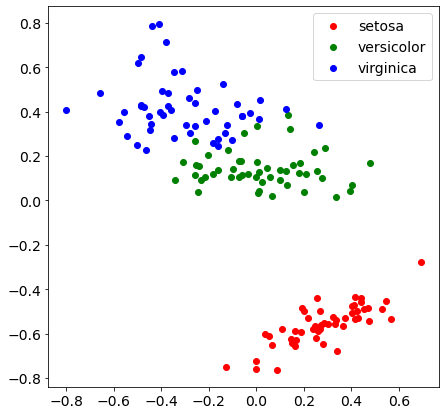

In [ ]:
# Source: https://towardsdatascience.com/visualize-multidimensional-datasets-with-mds-64d7b4c16eaa

import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

data = load_iris()
X = data.data

# print(data)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

mds = MDS(2,random_state=0)
X_2d = mds.fit_transform(X_scaled)

colors = ['red','green','blue']
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# print(data.target)
for i in np.unique(data.target):
  subset = X_2d[data.target == i]
  # subset = X_scaled[data.target == i]
  x = [row[0] for row in subset]
  y = [row[1] for row in subset]
  plt.scatter(x,y,c=colors[i],label=data.target_names[i])
# plt.xlim(-0.9, 0.9)
# plt.ylim(-0.9, 0.9)
plt.legend()
plt.show()

#helpful links - http://statweb.stanford.edu/~jtaylo/courses/stats202/mds.html
#mds documentation - https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html
